<a href="https://colab.research.google.com/github/it21023996/machine-learning/blob/main/SARIMAX_model_for_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv("AEP_hourly.csv")

In [3]:
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [4]:
df.shape

(121273, 2)

In [5]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [6]:
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [7]:
df.set_index('Datetime',inplace=True)

In [8]:
df.head()

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


In [9]:
df.isnull().sum()

,0
AEP_MW,0


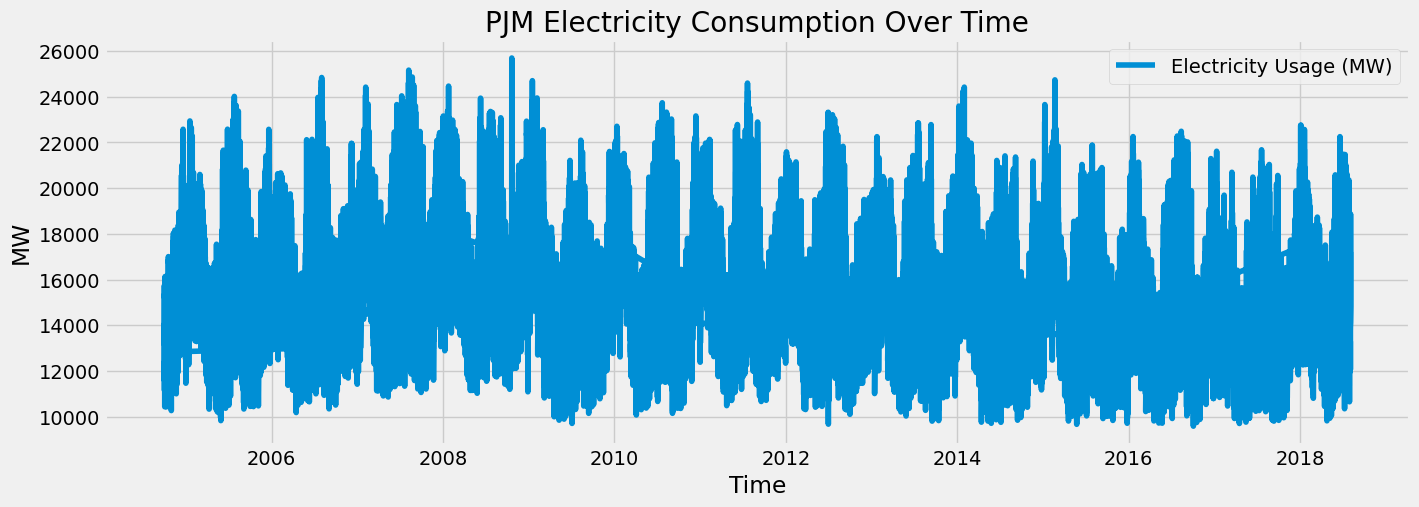

In [10]:
plt.figure(figsize=(15, 5))
plt.plot(df['AEP_MW'], label='Electricity Usage (MW)')
plt.title("PJM Electricity Consumption Over Time")
plt.xlabel("Time")
plt.ylabel("MW")
plt.legend()
plt.show()

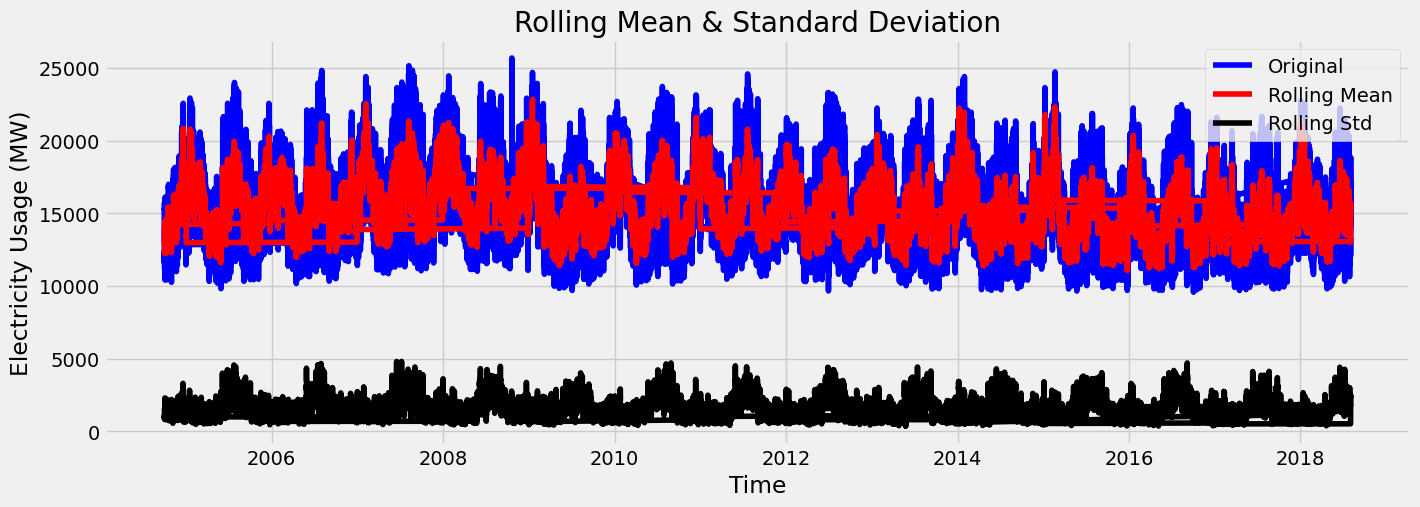

In [11]:
rolling_window = 24

rolling_mean = df['AEP_MW'].rolling(window = rolling_window).mean()
rolling_std = df['AEP_MW'].rolling(window = rolling_window).std()

plt.figure(figsize=(15,5))
plt.plot(df['AEP_MW'],color= 'blue', label= 'Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Time')
plt.ylabel('Electricity Usage (MW)')
plt.legend()
plt.show()

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
series = df['AEP_MW']

In [14]:
result = adfuller(series)

In [15]:
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -16.44681210468672
p-value: 2.3990113240021306e-29
Critical Values: {'1%': np.float64(-3.430403955318047), '5%': np.float64(-2.8615638474512295), '10%': np.float64(-2.566782693155802)}


In [16]:
if result[1] < 0.05:
    print("Series is Stationary")
else:
    print("Series is Non-Stationary")

Series is Stationary


In [ ]:
## this say stationary but inplot there is some trends .so use dfference

In [17]:
diff_series = series.diff().dropna()

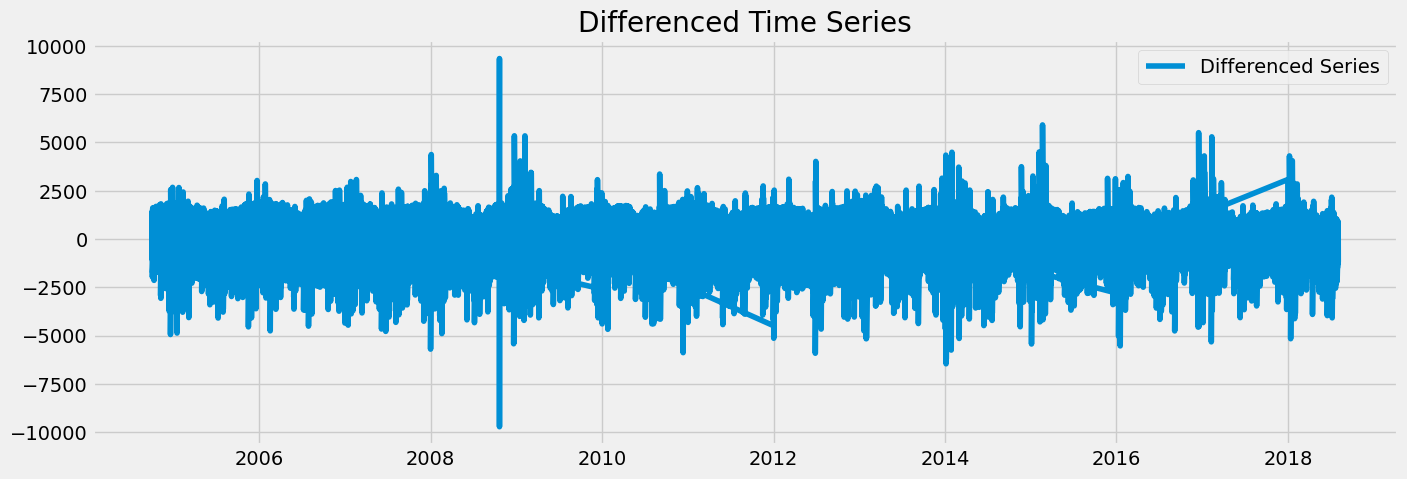

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(diff_series, label='Differenced Series')
plt.title('Differenced Time Series')
plt.legend()
plt.show()

In [19]:
result_adf_dif = adfuller(diff_series)

In [20]:
print('ADF Statistic:', result_adf_dif[0])
print('p-value:', result_adf_dif[1])
print('Critical Values:', result_adf_dif[4])

ADF Statistic: -45.05152316790396
p-value: 0.0
Critical Values: {'1%': np.float64(-3.430403955763232), '5%': np.float64(-2.861563847647993), '10%': np.float64(-2.566782693260533)}


In [21]:
if result[1] < 0.05:
    print("Series is Stationary")
else:
    print("Series is Non-Stationary")

Series is Stationary


In [ ]:
#ARIMA model

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x500 with 0 Axes>

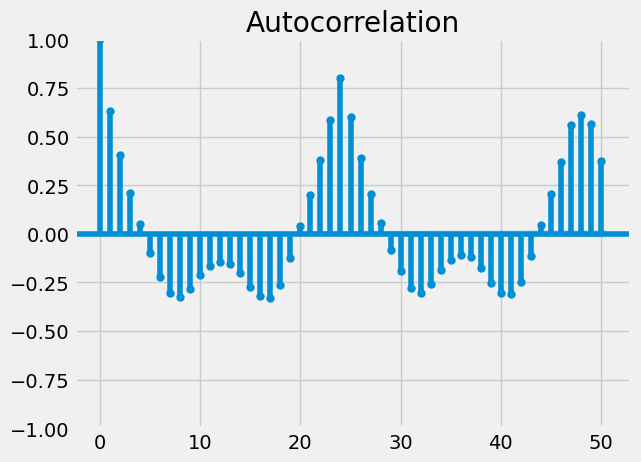

In [23]:
plt.figure(figsize=(12,5))
plot_acf(diff_series, lags=50)
plt.show

<Figure size 1200x500 with 0 Axes>

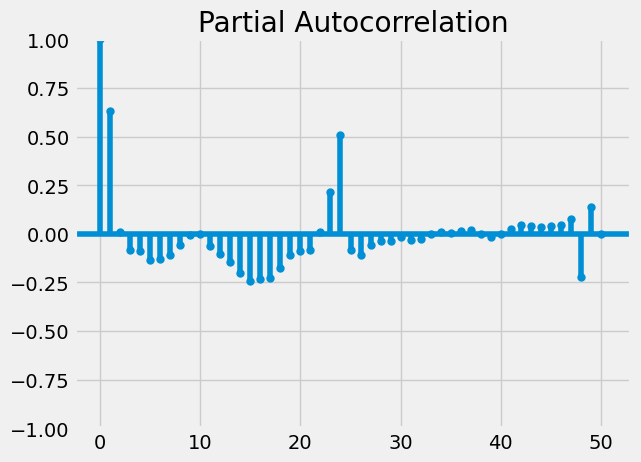

In [24]:
plt.figure(figsize=(12,5))
plot_pacf(diff_series, lags=50)
plt.show()

In [ ]:
###SARIMA(p, d, q) × (P, D, Q)_s

p, d, q → non-seasonal parts

P, D, Q → seasonal parts

s → length of the season (number of time steps per seasonal cycle)

For your model:
Non-seasonal part (p=2, d=0, q=0)

p = 2 → You look at the last 2 immediate time steps (AR(2)) to predict the current value.

d = 0 → No non-seasonal differencing (because your dataset is already differenced).

q = 0 → You’re not using short-term moving average terms.
    Seasonal part (P=1, D=0, Q=0, s=24)

P = 1 → You also look at the value one seasonal cycle ago (lag 24) to predict today’s value.

D = 0 → No seasonal differencing (again, because you already did it outside the model).

Q = 0 → No seasonal moving average terms.

s = 24 → The seasonal cycle repeats every 24 time steps (likely 24 hours in your data).

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [26]:
diff_series = diff_series.sort_index()

In [27]:
model = SARIMAX(
    diff_series,
    order=(2, 0, 0),
    seasonal_order=(1, 0, 0, 24),
    enforce_stationarity=False,
    enforce_invertibility=False
)
results = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [28]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                             AEP_MW   No. Observations:               121272
Model:             SARIMAX(2, 0, 0)x(1, 0, 0, 24)   Log Likelihood             -889865.711
Date:                            Thu, 14 Aug 2025   AIC                        1779739.422
Time:                                    05:53:51   BIC                        1779778.245
Sample:                                         0   HQIC                       1779751.103
                                         - 121272                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2214      0.001    223.512      0.000       0.219       0.223
ar.L2          0.0774      0.003   

In [41]:
forecast = results.forecast(steps=10)
df_forecast = pd.DataFrame({
    'Index': forecast_index,
    'Predicted': forecast
})

# Display the first few rows
print(df_forecast.head(10))

                     Index   Predicted
121272 2018-08-02 15:00:00  391.399609
121273 2018-08-02 16:00:00 -559.538223
121274 2018-08-02 17:00:00 -231.439157
121275 2018-08-02 18:00:00 -181.443481
121276 2018-08-02 19:00:00  117.947209
121277 2018-08-02 20:00:00  407.278704
121278 2018-08-02 21:00:00  644.943696
121279 2018-08-02 22:00:00  487.551398
121280 2018-08-02 23:00:00  372.520784
121281 2018-08-03 00:00:00  348.367468


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


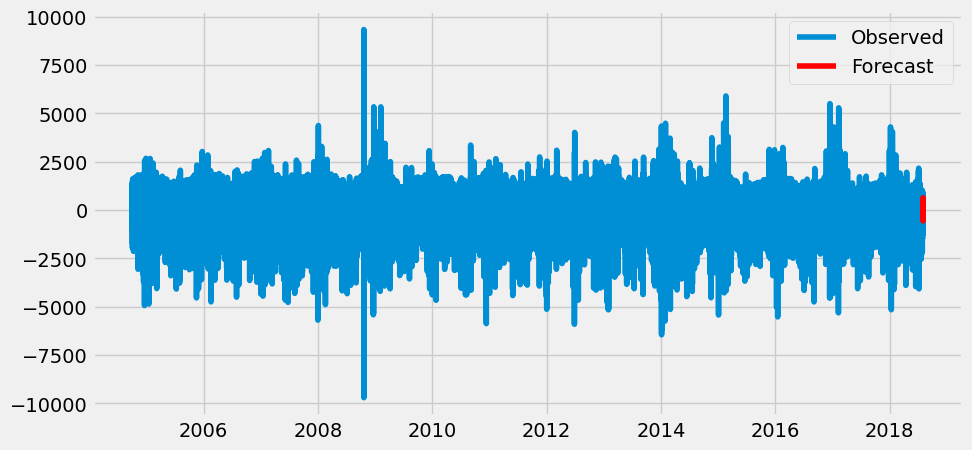

In [42]:
forecast_index = diff_series.index[-len(forecast):]
plt.figure(figsize=(10,5))
plt.plot(diff_series, label="Observed")
plt.plot(forecast_index, forecast, label="Forecast", color='red')
plt.legend()
plt.show()